![logo](../../picture/license_header_logo.png)
> **Copyright (c) 2020-2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

# Time Series Visualizations

A simple walkthrough on how to use Python to visualize time series data.
***

### i) Time plot

Using pandas_datareader library, we can easily import finance data for visualization exercise. Here we are using Apple's daily stock price.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import yfinance as yf  
from datetime import datetime
start = datetime(2010, 1, 1)
end = datetime(2015, 12, 31)

appl = yf.download('AAPL',start=start,end=end)
appl.head()

[*********************100%***********************]  1 of 1 completed


Let's plot a simple line chart of closing price against date.

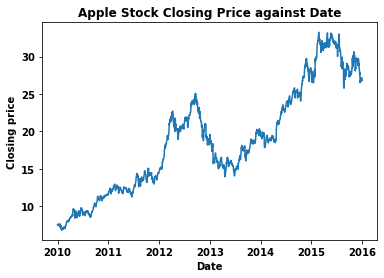

In [3]:
plt.plot(appl.Close)
plt.ylabel('Closing price')
plt.xlabel('Date')
plt.title('Apple Stock Closing Price against Date')
plt.show()

Let's plot a multivariate time series line chart consisting of two stock prices, Apple and Microsoft

In [4]:
msft = yf.download("MSFT", start=start, end=end)
msft.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.980000,30.990000,30.480000,30.480000,23.630186,31929700
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.994564,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,24.002319,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.855013,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.606922,50559700


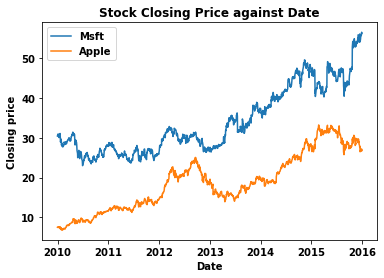

In [5]:
plt.plot(msft.Close, label="Msft")
plt.plot(appl.Close, label="Apple")
plt.ylabel('Closing price')
plt.xlabel('Date')
plt.title('Stock Closing Price against Date')
plt.legend()
plt.show()

Another way is to use plot() method on DataFrame. Demonstrated below is a way on how to perform lag differencing and plotting it using Matplotlib.

In [6]:
import io
import requests
import pandas as pd

# let's specify the url link
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url)

# Let's print parts of the data
print(df.head())

# The collected data is actually starting in 2000, but the data seem to misrepresent the year. So we will need to make some modifications
df.Month = ['200' + row for row in df.Month]
# df = pd.DataFrame({"Month": ["a", "b", "a"]})
    
print(df.head())
    

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3
     Month  Sales
0  2001-01  266.0
1  2001-02  145.9
2  2001-03  183.1
3  2001-04  119.3
4  2001-05  180.3


Well, it is kinda difficult to work with a time series data without time indexing it. So let's try to set the time index.

In [7]:
df_indexed = df.set_index("Month")
df_indexed.index = pd.to_datetime(df_indexed.index, format="%Y-%m")

df_indexed.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


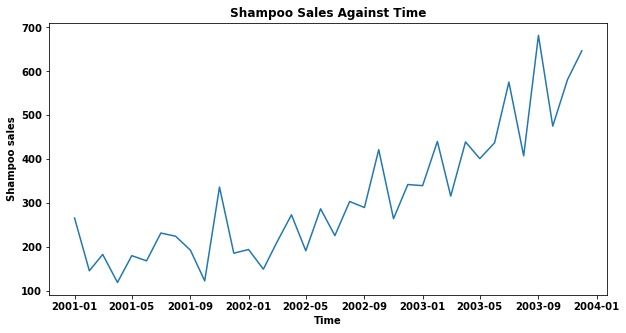

In [8]:
plt.figure(figsize=(10,5))
plt.ylabel("Shampoo sales")
plt.xlabel("Time")
plt.title("Shampoo Sales Against Time")
plt.plot(df_indexed.Sales)

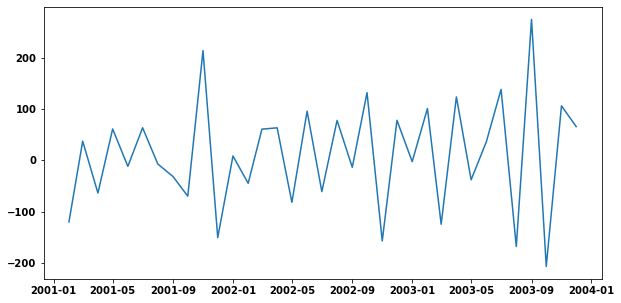

In [9]:
# let's do 1-order differencing and plot it out
df_diff1 = df_indexed.diff()
plt.figure(figsize=(10,5))
plt.plot(df_diff1)

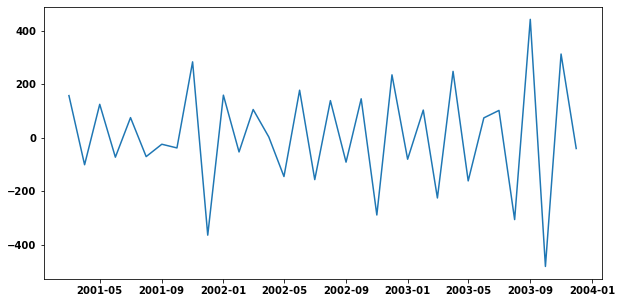

In [10]:
# let's difference it a second time
df_diff2 = df_diff1.diff()
plt.figure(figsize=(10, 5))
plt.plot(df_diff2)

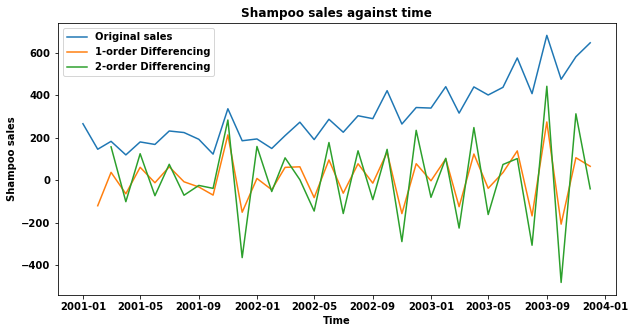

In [11]:
# let's plot all of the dataframes together in the same graph
plt.figure(figsize=(10, 5))
plt.ylabel("Shampoo sales")
plt.xlabel("Time")
plt.title("Shampoo sales against time")
plt.plot(df_indexed, label='Original sales')
plt.plot(df_diff1, label='1-order Differencing')
plt.plot(df_diff2, label='2-order Differencing')
plt.legend()
plt.show()

We can also plot out a simple line chart to check the trend or seasonality of it. (Using a dataset containing information on the beer production in Australia)

In [12]:
beer = pd.read_csv("../../datasets/decomposition/AusBeer.csv", parse_dates=False)
beer["Period"] = beer.Year.apply(str) +'-'+ beer.Quarter
beer.drop(labels=["Year", "Quarter", "Time"], axis=1, inplace=True)
beer['Period'] = pd.to_datetime(beer.Period)
# beer.Period = pd.PeriodIndex(beer.Period, freq="Q")
beer = beer.set_index(beer.Period)
beer = beer.rename(columns={"Beer.Production":"Production"})
beer.drop(labels="Period", axis=1, inplace=True)
beer

,Production
Period,
1956-01-01,284
1956-04-01,213
1956-07-01,227
1956-10-01,308
1957-01-01,262
...,...
2009-04-01,398
2009-07-01,419
2009-10-01,488


For illustration purpose, we will just look at the data from year 1960 to 1967.

In [13]:
beer = beer.loc["1960":"1967"]

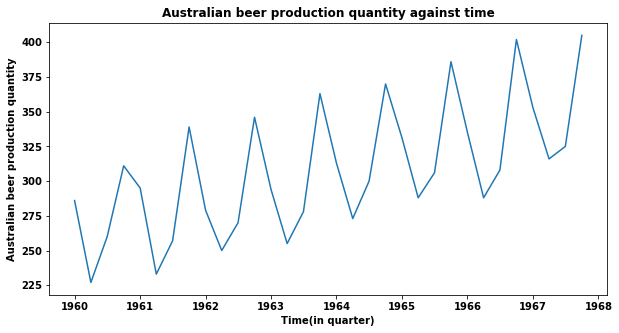

In [14]:
plt.figure(figsize=(10, 5))
plt.title("Australian beer production quantity against time")
plt.ylabel("Australian beer production quantity")
plt.xlabel("Time(in quarter)")
plt.plot(beer.index, beer.Production)

This is an example of additive decomposition.

In [15]:
passengers = pd.read_csv("../../datasets/decomposition/AirPassengers.csv", index_col=0, parse_dates=True)
passengers.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


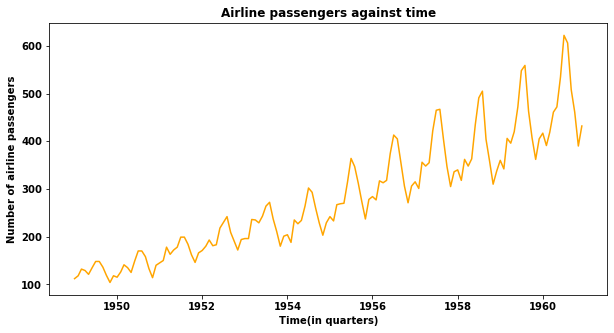

In [16]:
plt.figure(figsize=(10, 5))
plt.title("Airline passengers against time")
plt.ylabel("Number of airline passengers")
plt.xlabel("Time(in quarters)")
plt.plot(passengers, color='orange')

### ii) Lag plot

A lag plot is defined as:

***
*plot of observations against its lagged self, where x-axis is the observations at time t and y-axis is the observations at time t-k*
***

We can straightaway call a Pandas method in order to plot a lag plot.

Some characteristics of a lag plot are:
* points cluster around diagonal line from bottom-left to top-right indicates autocorrelation

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

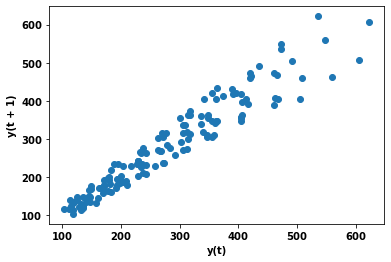

In [17]:
from pandas.plotting import lag_plot

lag_plot(passengers, lag=1)

It appears that there is an autocorrelation between the number of airline passengers against itself at lag-1. This makes sense as, according to the time plot, the number of airline passengers in a consecutive month does not differ much from the numbers in the current month.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

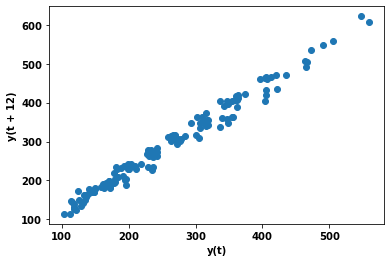

In [18]:
# let's see whether if there is any autocorrelation for lag-12 since the time plot appears to have an annual seasonality
lag_plot(passengers, lag=12) 

The autocorrelation is even stronger. This is quite logical as what is evident in the time plot, where the peaks and troughs of a season tends to be in the same month every year.

### iii) ACF

Next, we will plot an autocorrelation function (ACF) graph using methods from statsmodels library. Statsmodels library is one of the go-to libraries for statistical methods.

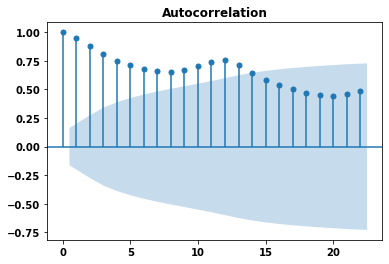

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(passengers);

This confirms that the autocorrelation strength is strongest at lag-12.

### iv) PACF

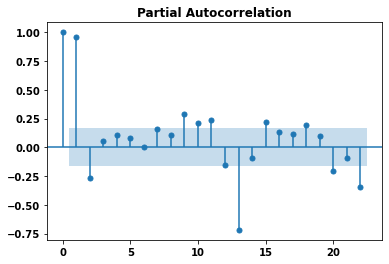

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(passengers);

This indicates that we could use AR(2) to model this time series, since there are two significant peaks other than the first peak. Nevertheless, more rigorous statistical test should be conducted to confirm this.

### v) Q-Q Plot

Q-Q plot is short for Quantile-Quantile plot. Its main usage in data analysis is to display a plot that illustrates how the data fits normal distribution.

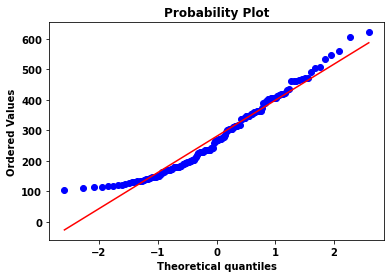

In [21]:
import scipy.stats
import pylab

scipy.stats.probplot(passengers['#Passengers'], plot=pylab)
plt.show()

Some explanation for the plot:
1. Red diagonal line indicates the location where the observations should be situated if they follow normal distribution
2. X-axis indicates how many standard deviations away that the observations lie from mean 
3. Y-axis represents the value of observations

Thus, based on the visualization, it appears that the amount of airline passengers over the years are not normally distributed. This is common for time series data.

## Part 2: Pseudodata Generation

In [22]:
from numpy.random import seed
from numpy.random import randn 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for reproducibility
seed(123)

# generate normally distributed univariate observations, scale up 5 std and 100 mean
random_data = 5 * randn(100) + 100

# summarize
print("mean: %.3f \nstd: %.3f" % (np.mean(random_data), np.std(random_data)))


mean: 100.136 
std: 5.641


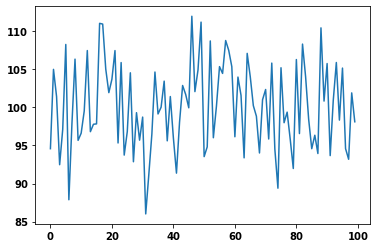

In [23]:
plt.plot(random_data, linestyle="-");

In [24]:
import pandas as pd
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"
df = pd.read_csv(url)
pd.set_option("display.max.columns", None) # display all columns
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [25]:
df = pd.read_csv("../../datasets/decomposition/daily-total-female-births.csv", index_col="Date", parse_dates=True)
upper_outlier_boundary = df.mean()+1.5*(df.std())
lower_outlier_boundary = df.mean()-1.5*(df.std())
print(upper_outlier_boundary)
# df["upper_outlier_boundary"] = np.resize(upper_outlier_boundary, (365, 1))
df["upper_outlier_boundary"] = int(upper_outlier_boundary)
df["lower_outlier_boundary"] = int(lower_outlier_boundary)
df.head()

Births    53.003208
dtype: float64


,Births,upper_outlier_boundary,lower_outlier_boundary
Date,,,
1959-01-01,35,53,30
1959-01-02,32,53,30
1959-01-03,30,53,30
1959-01-04,31,53,30
1959-01-05,44,53,30


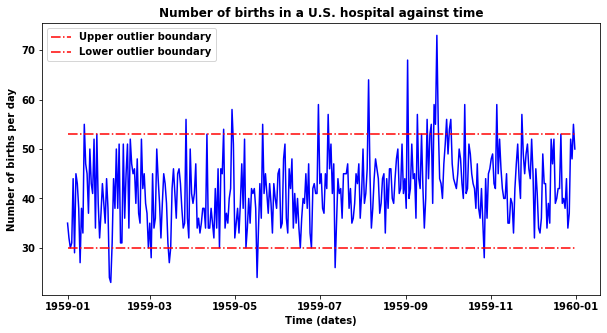

In [26]:
plt.figure(figsize=(10, 5))
plt.title("Number of births in a U.S. hospital against time")
plt.xlabel("Time (dates)")
plt.ylabel("Number of births per day")
plt.plot(df.Births, color="blue")
plt.plot(df.upper_outlier_boundary, color="red", linestyle="-.", label="Upper outlier boundary")
plt.plot(df.lower_outlier_boundary, color="red", linestyle="-.", label="Lower outlier boundary")
plt.legend()
plt.show()

In [27]:
column_names = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Wind Direction']
df = pd.read_csv("../../datasets/others/weather_history_kuala_lumpur.csv", header=9, index_col=0, parse_dates=True, names=column_names)
df.head()

,Temperature,Relative Humidity,Wind Speed,Wind Direction
2020-11-27 00:00:00,26.522346,84.0,4.104631,74.74488
2020-11-27 01:00:00,25.822346,91.0,5.014219,68.96249
2020-11-27 02:00:00,25.302345,94.0,4.829907,63.43495
2020-11-27 03:00:00,24.962345,95.0,5.116561,50.71060
2020-11-27 04:00:00,24.472345,98.0,5.116561,50.71060


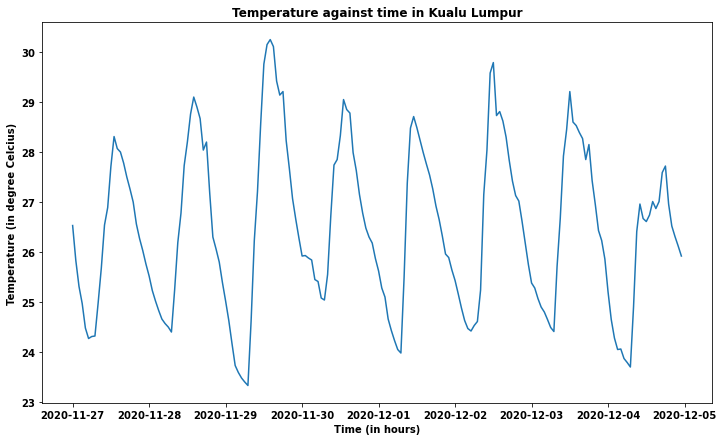

In [28]:
plt.figure(figsize=(12, 7))
plt.xlabel("Time (in hours)")
plt.ylabel("Temperature (in degree Celcius)")
plt.title("Temperature against time in Kualu Lumpur")
plt.plot(df.Temperature)
plt.show()

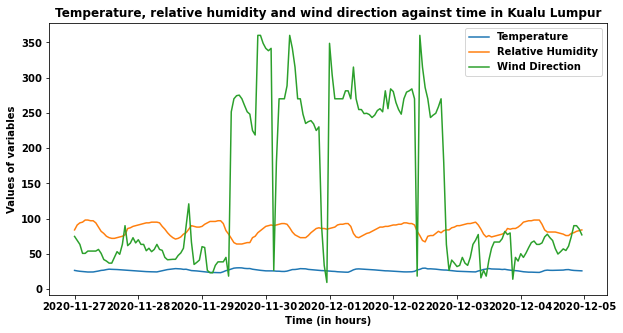

In [29]:
plt.figure(figsize=(10, 5))
plt.xlabel("Time (in hours)")
plt.ylabel("Values of variables")
plt.title("Temperature, relative humidity and wind direction against time in Kualu Lumpur")
plt.plot(df["Temperature"], label="Temperature")
plt.plot(df["Relative Humidity"], label="Relative Humidity")
plt.plot(df["Wind Direction"], label="Wind Direction")
plt.legend()
plt.show()

## Exercise

We will run through a simple exercise of time series visualizations.

Tasks that you are required to perform are listed below as comments. Please insert your codes below the comment. An approximation of number of lines *n* is provided as a guideline to help you.

### i) Time plot

[*********************100%***********************]  1 of 1 completed


DateTimeIndex is :
DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10', '2015-01-11',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=729, freq='D')


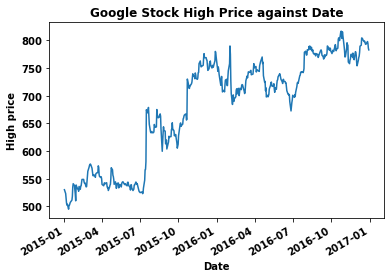

In [30]:
# import necessary modules (~ 4 lines of code)
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# get Google stock price from 2nd Jan, 2015 until 31st December, 2016 from Yahoo (~ 1 line of code) 
# hint: ticker for Google is GOOG
goog = yf.download('GOOG', start='2015-1-2', end='2016-12-31')

# set the frequency of DateTimeIndex to monthly (~ 1 line of code) 
goog = goog.asfreq('D')

# confirm the index and its frequency (~ 1 line of code) 
date_time_index = goog.index
print(f"\n\nDateTimeIndex is :\n{date_time_index}")

# remove NAN values that resulted due to the non-trading day (~ 1 line of code) 
goog = goog.dropna(axis=0, how='any')

# plot a simple line chart of high price against time (~ 1 line of code) 
goog['High'].plot()

# provide x-axis label as 'Date' (~ 1 line of code) 
plt.xlabel('Date')

# provide y-axis label as 'High price' (~ 1 line of code) 
plt.ylabel('High price')

# provide figure title as 'Google Stock High Price against Date' (~ 1 line of code) 
plt.title('Google Stock High Price against Date')

# display the plot
plt.show()

In [31]:
# You can display your object here
goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563.0
2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840.0
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940.0
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054.0
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582.0
...,...,...,...,...,...,...
2016-12-23,790.900024,792.739990,787.280029,789.909973,789.909973,623400.0
2016-12-27,790.679993,797.859985,787.656982,791.549988,791.549988,789100.0
2016-12-28,793.700012,794.229980,783.200012,785.049988,785.049988,1153800.0


### ii) Lag plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

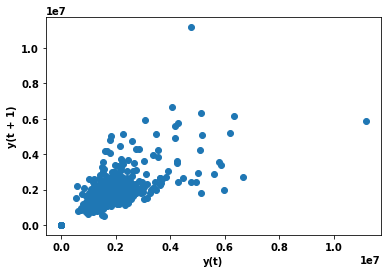

In [32]:
# import library  (~ 1 line of code) 
from pandas.plotting import lag_plot

# plot a lag plot for lag of 1 using Google stock price data that we acquired earlier
lag_plot(goog, lag=1)

Q: Are there any autocorrelation based on the lag plot? \
A: Not evident.

### iii) ACF

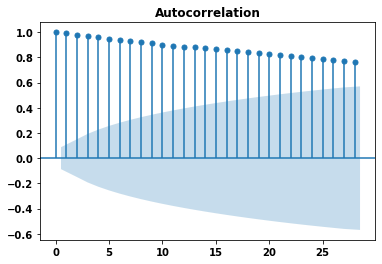

In [33]:
# import library  (~ 1 line of code) 
from statsmodels.graphics.tsaplots import plot_acf

# plot ACF correlogram using Google High price and Statsmodels 
# package (~ 1 line of code) 
plot_acf(goog.High);

**Q:** Does the daily price of Google stocks have a high autocorrelation? \
**A:** Yes.

### iv) PACF

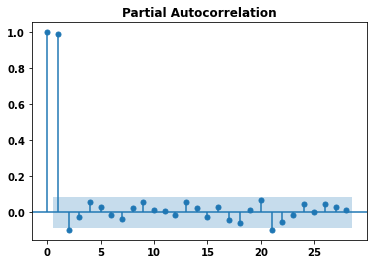

In [34]:
# import library  (~ 1 line of code) 
from statsmodels.graphics.tsaplots import plot_pacf

# plot PACF correlogram of low price of Google stock data
plot_pacf(goog.Close);

**Q:** Do you think that we have any signal that we can gain from this PACF correlogram? \
**A:** Yes, it has signicant AR coefficient of lag-2.

### v) Q-Q Plot

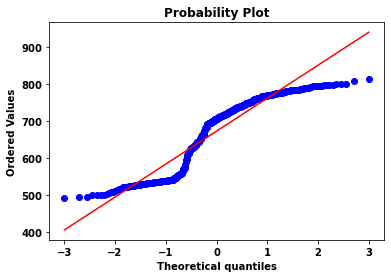

In [35]:
# import library (~ 2 lines of code)
import scipy.stats
import pylab

# plot Q-Q plot of Google stock daily closing price (~1 line of code)
scipy.stats.probplot(goog.Close, plot=pylab)
plt.show()

**Q:** Do you think the data points are normally distributed? \
**A:** No, it is not. This is common for time series data.

## References
1. https://towardsdatascience.com/4-pandas-plotting-function-you-should-know-5a788d848963
2. https://www.meteoblue.com/en/weather/archive/export/kuala-lumpur_malaysia_1735161